In [1]:
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

In [13]:
with open('./Style2Vec/data/label/train_no_dup.json') as data:
    data = data.read()
    data = json.loads(data)

In [14]:
# no of sets
len(data)

17316

In [15]:
data[0]

{'name': 'Casual',
 'views': 8743,
 'items': [{'index': 1,
   'name': 'mock neck embroidery suede sweatshirt',
   'price': 24.0,
   'likes': 10,
   'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=194508109',
   'categoryid': 4495},
  {'index': 2,
   'name': 'luxe double zip hooded jacket',
   'price': 150.0,
   'likes': 2250,
   'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=188778349',
   'categoryid': 25},
  {'index': 3,
   'name': 'citizens humanity high rise rocket hem jean',
   'price': 248.0,
   'likes': 2437,
   'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=188977857',
   'categoryid': 27},
  {'index': 4,
   'name': 'suede tie short boots',
   'price': 37.0,
   'likes': 2,
   'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=194942557',
   'categoryid': 261},
  {'index': 5,
   'name': 'cloth travel school backpack',
   'price': 22.0,
   'likes': 2,
   'image': 'http://img2.polyvoreim

In [16]:
results = defaultdict(int)

for d in data:
    for item in d['items']:
        results[item['categoryid']] += 1

In [17]:
# Shows original item category counts distribution
import plotly.express as px
import pandas as pd

df = pd.DataFrame.from_dict(results, orient = 'index')

fig = px.bar(df, x=df.index, y=df[0])
plt.figure(figsize=(16,14))
fig.show()


<Figure size 1152x1008 with 0 Axes>

In [18]:
# no.of images
df[0].sum()

114806

In [58]:
for item in data:
    for i in item['items']:
        # Filter out lists of items that are not fashion related
        # Refer to list below
        if i['categoryid'] in [102,51,74,76,77,78,113,115,116,118,122,123,124,
                               93,94,95,96,97,98,99,
                               126,127,129,130,132,135,136,139,140,
                               141,143,144,4241,4242,147,4244,150,
                               4247,4248,153,154,155,157,4254,159,
                               160,4257,162,163,164,166,167,168,169,
                               170,4267,172,173,174,175,176,177,178,
                               179,180,181,182,4292,
                               184,185,186,187,189,190,191,192,193,194,
                               195,197,198,199,200,201,202,203,204,205,
                               206,207,208,209,211,213,214,216,217,218,
                               219,220,221,222,223,224,225,226,227,228,229,
                               308,311,313,314,316,317,319,320,321,
                               4433,338,339,340,4439,4440,4443,4445,4446,
                               4448,4449,4450,4451,4480,4481,4482,4483,
                               4484,4485,4486,4487,4488,4489,4490,4492,
                               4493,4499,4500,4501,4502,4503,4504,4505,
                               4506,4507,4508,4509,4510,4511,4512,4513,
                               4514,4438,4240,146,148,4246,151,152,949,
                               161,4258,171,4269,196,3336,1967,4429,4430,
                               4431,336,337,4434,4435,4436]:
            
            # So image can't be fetched into training the model
            item['items'].remove(i)
        # Copy set_id from original set to each context image item as path to img is set_id/index
        i['set_id'] = item['set_id']

In [59]:
data[8]

{'name': 'Enjoy your own company',
 'views': 1142,
 'items': [{'index': 1,
   'name': 'valentino pleated cotton-blend dress',
   'price': 405.0,
   'likes': 73,
   'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=138670420',
   'categoryid': 4,
   'set_id': '185225843'},
  {'index': 2,
   'name': 'valentino red ruffle detail blouse',
   'price': 224.0,
   'likes': 1686,
   'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=143242359',
   'categoryid': 17,
   'set_id': '185225843'},
  {'index': 3,
   'name': 'valentino wool-blend coat',
   'price': 3040.0,
   'likes': 214,
   'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=148238250',
   'categoryid': 24,
   'set_id': '185225843'},
  {'index': 4,
   'name': 'valentino rockstud metallic leather pumps',
   'price': 845.0,
   'likes': 1159,
   'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=151390452',
   'categoryid': 43,
   'set_id': '185225843'},

In [60]:
img_results = defaultdict(int)

for d in data:
    for item in d['items']:
        img_results[d['set_id']] += 1

In [61]:
print("Remaining images: {}".format(sum(list(img_results.values()))))

Remaining images: 91244


In [62]:
remain_list = []

# Inspect remaining items
for d in data:
    if d['set_id'] in img_results.keys():
        for i in d['items']:
            remain_list.append(i['categoryid'])

In [63]:
img_results.keys()

dict_keys(['214181831', '120161271', '143656996', '186627934', '206969379', '201969694', '216470135', '216220312', '185225843', '213824660', '118117317', '196794889', '192203629', '194797482', '211763424', '162246887', '215293689', '206960557', '152669888', '215196328', '212866780', '215963491', '212745062', '158068564', '186569522', '215224271', '206144854', '214333201', '199683429', '216661833', '214478843', '167870137', '216601452', '212749574', '200282569', '216527510', '216890354', '214964957', '104793371', '216960118', '132440126', '196207399', '191351163', '132081114', '205802546', '216725521', '216057523', '122754559', '138431148', '207437487', '179583174', '202255709', '110629024', '100774542', '188480725', '212381804', '183266525', '175232162', '214768398', '210548859', '212812915', '211687168', '217006074', '214394737', '213950601', '216191457', '212285137', '205932272', '191904127', '210321457', '204256557', '186446024', '216341850', '156117458', '214160678', '156269352', '

In [67]:
for d in data:
    if d['set_id'] in '206697445':
        for i in d['items']:
            print(i)
            print(i['categoryid'])

{'index': 1, 'name': 'shoulder casual loose tassel solid mini women dress', 'price': 21.0, 'likes': 1931, 'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=178765444', 'categoryid': 4, 'set_id': '206697445'}
4
{'index': 2, 'name': 'jimmy choo suede platform sandals', 'price': 670.0, 'likes': 7620, 'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=172308194', 'categoryid': 46, 'set_id': '206697445'}
46
{'index': 3, 'name': "women's michael michael kors leather wallet", 'price': 160.0, 'likes': 103, 'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=126265039', 'categoryid': 40, 'set_id': '206697445'}
40
{'index': 4, 'name': 'jewelry gold coral bead stacking bracelets set', 'price': 315.0, 'likes': 1703, 'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=160475009', 'categoryid': 106, 'set_id': '206697445'}
106
{'index': 5, 'name': 'fire swing back earrings', 'price': 35.0, 'likes': 517, 'image': 'http:

In [68]:
with open('./Style2Vec/data/label/train_no_dup_clean.json',"w") as output_file:
    json.dump(data, output_file)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
embed = np.load('./Style2Vec/models/embeding.npy', allow_pickle=True)

In [8]:
ref = [74,76,77,78,113,115,116,118,122,123,124,
                               93,94,95,96,97,98,99,
                               126,127,129,130,132,135,136,139,140,
                               141,143,144,4241,4242,147,4244,150,
                               4247,4248,153,154,155,157,4254,159,
                               160,4257,162,163,164,166,167,168,169,
                               170,4267,172,173,174,175,176,177,178,
                               179,180,181,182,4292,
                               184,185,186,187,189,190,191,192,193,194,
                               195,197,198,199,200,201,202,203,204,205,
                               206,207,208,209,211,213,214,216,217,218,
                               219,220,221,222,223,224,225,226,227,228,229,
                               308,311,313,314,316,317,318,319,320,321,
                               4433,338,339,340,4439,4440,4443,4445,4446,
                               4448,4449,4450,4451,4480,4481,4482,4483,
                               4484,4485,4486,4487,4488,4489,4490,4492,
                               4493,4499,4500,4501,4502,4503,4504,4505,
                               4506,4507,4508,4509,4510,4511,4512,4513,
                               4514,4438,4240,146,148,4246,151,152,949,
                               161,4258,171,4269,196,3336,1967,4429,4430,
                               4431,336,337,4434,4435,4436]

In [8]:
new_embed = [e for e in embed if e[1] not in ref]

In [9]:
# removed non-fashion items
len(new_embed)

6791

In [ ]:
np.save('')

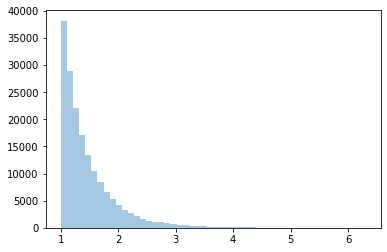

In [7]:
# Distribution of values in embeddings shows values beyond 1
sns.distplot(results, kde=False);

In [9]:
max(results)

6.3018074

In [10]:
min(results)

1.0000014